# SPORTS CELEBS IMAGE CLASSIFICATION
---

##### Importing required packages and libaries
---

In [116]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

##### (1) Preprocessing: Detect face and eyes
---

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

We will use haar cascade from opencv for this. 

In [117]:
img = cv2.imread("C:\\Sports Celeb Classifier\\model\\test_images\\8267e29f161820a9621fdf15a6be83dd.jpg")
img.shape

(268, 236, 3)

In [118]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[251, 181,  87],
        [246, 175,  78],
        [243, 167,  71],
        ...,
        [249, 151,  44],
        [248, 153,  49],
        [240, 149,  44]],

       [[255, 189,  96],
        [252, 184,  89],
        [245, 173,  79],
        ...,
        [247, 149,  41],
        [246, 155,  47],
        [242, 154,  46]],

       [[217, 153,  59],
        [218, 151,  58],
        [213, 143,  50],
        ...,
        [239, 144,  35],
        [242, 151,  43],
        [243, 155,  47]]

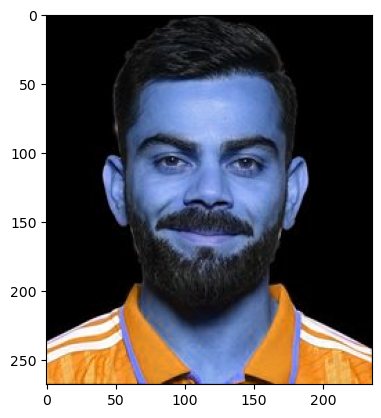

In [119]:
plt.imshow(img)
plt.show()

In [120]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(268, 236)

In [121]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [161, 154, 147, ..., 130, 133, 128],
       [169, 163, 153, ..., 128, 133, 132],
       [132, 131, 123, ..., 122, 129, 133]], dtype=uint8)

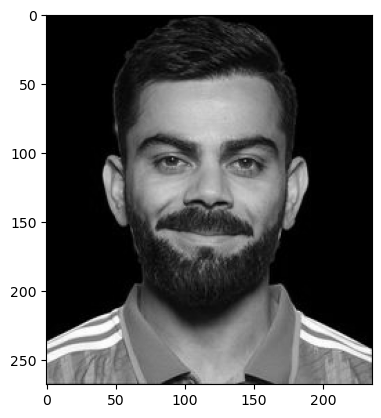

In [122]:
plt.imshow(gray, cmap='gray')

In [123]:
face_cascade = cv2.CascadeClassifier('C://Sports Celeb Classifier//model//opencv//haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C://Sports Celeb Classifier//model//opencv//haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 45,  50, 144, 144]])

In [124]:
(x,y,w,h) = faces[0]
x,y,w,h

(45, 50, 144, 144)

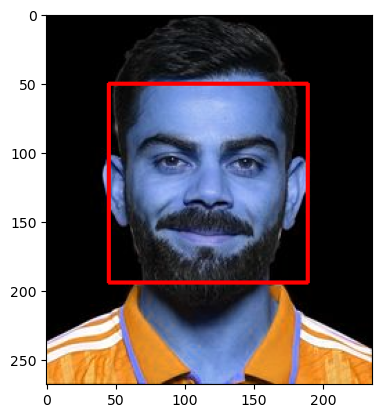

In [125]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

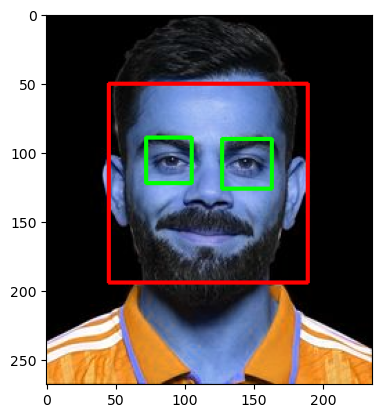

In [126]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

##### (2) Preprocessing: Crop the facial region of the image
---

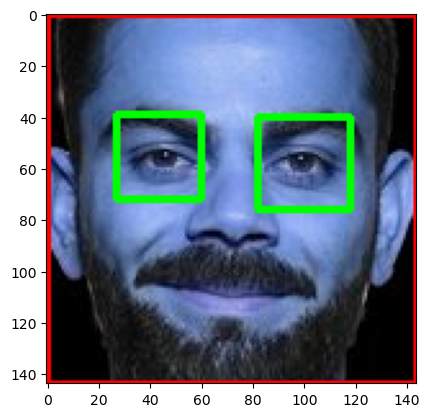

In [127]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

##### (3) Preprocessing: Use wavelet transform as a feature for traning our model
---


In wavelet transformed image, we can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [128]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

WE can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for the classifier

##### (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
---

A python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

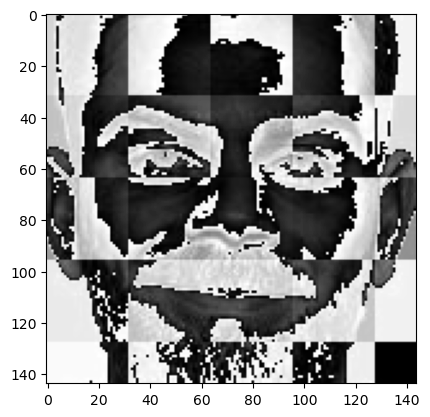

In [129]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [130]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

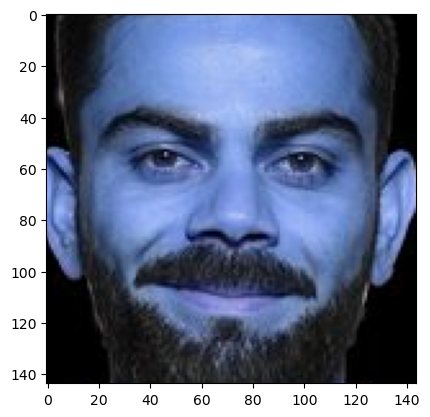

In [131]:
cropped_image = get_cropped_image_if_2_eyes('C:\\Sports Celeb Classifier\\model\\test_images\\8267e29f161820a9621fdf15a6be83dd.jpg')
plt.imshow(cropped_image)
plt.show()

#### In below image face is not very clear and it doesn't have two eyes clearly visible

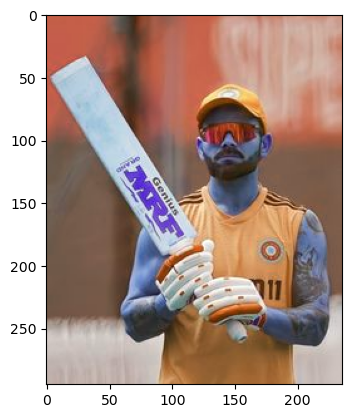

In [132]:
org_image_obstructed = cv2.imread("C:\\Sports Celeb Classifier\\model\\test_images\\c8159a22643301a1bf05aa548057e7c3.jpg")
plt.imshow(org_image_obstructed)
plt.show()

In [149]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("C:\\Sports Celeb Classifier\\model\\test_images\\c8159a22643301a1bf05aa548057e7c3.jpg")
cropped_image_no_2_eyes

In [150]:
path_to_data = "C:\\Sports Celeb Classifier\\model\\dataset\\"
path_to_cr_data = "C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\"

In [151]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [152]:
img_dirs

['C:\\Sports Celeb Classifier\\model\\dataset\\lionel_messi',
 'C:\\Sports Celeb Classifier\\model\\dataset\\maria_sharapova',
 'C:\\Sports Celeb Classifier\\model\\dataset\\roger_federer',
 'C:\\Sports Celeb Classifier\\model\\dataset\\serena_williams',
 'C:\\Sports Celeb Classifier\\model\\dataset\\virat_kohli']

In [153]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [154]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:\Sports Celeb Classifier\model\dataset\cropped\lionel_messi
Generating cropped images in folder:  C:\Sports Celeb Classifier\model\dataset\cropped\maria_sharapova
Generating cropped images in folder:  C:\Sports Celeb Classifier\model\dataset\cropped\roger_federer
Generating cropped images in folder:  C:\Sports Celeb Classifier\model\dataset\cropped\serena_williams
Generating cropped images in folder:  C:\Sports Celeb Classifier\model\dataset\cropped\virat_kohli


Now we have cropped folder under datasets folder that contains cropped images

Manually examining cropped folder and deleting any unwanted images

In [156]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi': ['C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi1.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi10.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi11.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi12.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi13.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi14.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi15.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi16.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi17.png',
  'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi\\lionel_messi18.png',
  'C:\\Spor

In [157]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi': 0,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\maria_sharapova': 1,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\roger_federer': 2,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\serena_williams': 3,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\virat_kohli': 4}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train the classifier. Preparing X and y now

In [158]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [159]:
len(X[0])

4096

In [160]:
32*32*3 + 32*32

4096

In [161]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [162]:
y[0]

0

In [163]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

Data cleaning process is done. 

##### Training the model
---

We will use SVM with rbf kernel tuned with heuristic finetuning

In [164]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8571428571428571

In [166]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      0.78      0.88         9
           2       0.86      0.86      0.86         7
           3       0.75      0.86      0.80         7
           4       0.79      1.00      0.88        11

    accuracy                           0.86        42
   macro avg       0.88      0.85      0.85        42
weighted avg       0.88      0.86      0.86        42



GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [170]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [171]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [173]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.801538,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666462,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.808923,{'logisticregression__C': 1}


In [174]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [175]:
best_estimators['svm'].score(X_test,y_test)

0.8809523809523809

In [176]:
best_estimators['random_forest'].score(X_test,y_test)

0.6904761904761905

In [177]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8809523809523809

In [178]:
best_clf = best_estimators['svm']

In [179]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  2,  0],
       [ 0,  8,  0,  1,  0],
       [ 0,  0,  6,  1,  0],
       [ 0,  0,  1,  6,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

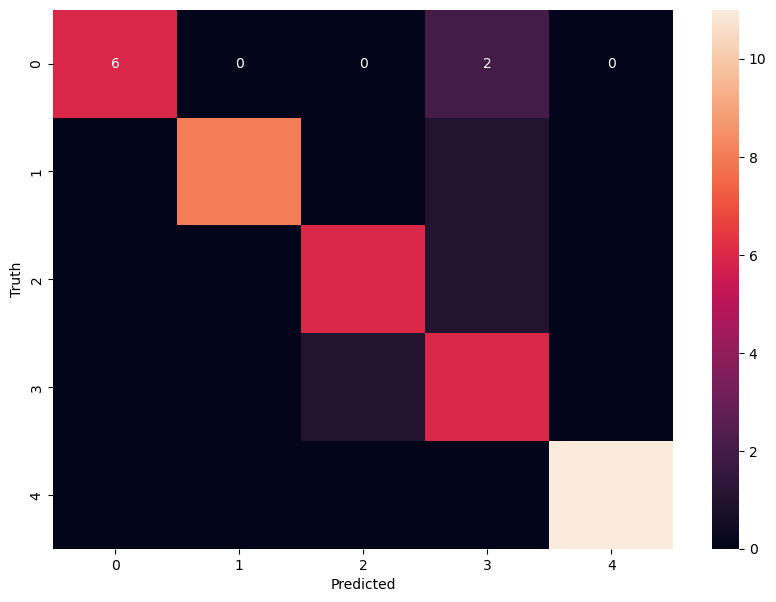

In [180]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [181]:
class_dict

{'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\lionel_messi': 0,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\maria_sharapova': 1,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\roger_federer': 2,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\serena_williams': 3,
 'C:\\Sports Celeb Classifier\\model\\dataset\\cropped\\virat_kohli': 4}

##### Save the trained model
---

In [182]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

##### Save class dictionary
---

In [183]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))